In [33]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [34]:
from PFNExperiments.LinearRegression.GenerativeModels.Curriculum import Curriculum
from PFNExperiments.LinearRegression.GenerativeModels.GenerateDataCurriculumCFM import GenerateDataCurriculumCFM
from PFNExperiments.LinearRegression.Models.Transformer_CNF import TransformerCNFConditionalDecoder
from PFNExperiments.Training.FlowMatching.CFMLossOT2 import CFMLossOT2
from PFNExperiments.LatentFactorModels.Training.TrainerCurriculumCNF_LatentFactor import TrainerCurriculumCNF_LatentFactor
import torch
from torch.optim.lr_scheduler import ReduceLROnPlateau, OneCycleLR
from PFNExperiments.LinearRegression.Models.ModelToPosteriorCNF import ModelToPosteriorCNF
from PFNExperiments.LatentFactorModels.ComparisonModels.Hamiltionian_MC import Hamiltionian_MC
from PFNExperiments.Evaluation.Evaluate import Evaluate, results_dict_to_data_x_tuple, result_dict_to_latent_variable_convert_mu_sigma_to_beta, results_dict_to_data_x_tuple_transpose

In [35]:
from PFNExperiments.LatentFactorModels.GenerativeModels.Clustering.GMMs import make_gmm_program_spherical, make_gmm_program_spherical_batched
from PFNExperiments.LatentFactorModels.GenerativeModels.LatenFactorModel_abstract import return_only_x

from PFNExperiments.LatentFactorModels.ComparisonModels.MakeDefaultListComparison import make_default_list_comparison, make_reduced_list_comparison


In [36]:
N = 10
P = 4
K = 3
BATCH_SIZE = 1024
N_EPOCHS = 100
N_SAMPLES_PER_EPOCH = 500_000
N_BATCHES_PER_EPOCH = N_SAMPLES_PER_EPOCH//BATCH_SIZE

In [37]:
curriculum = Curriculum(max_iter=int(N_EPOCHS*N_BATCHES_PER_EPOCH*BATCH_SIZE*0.5))
curriculum.add_param_list([
    ("n", curriculum.constant_scheduler(N)),
    ("p", curriculum.constant_scheduler(P)),
    ("k", curriculum.constant_scheduler(K)),
    ("batch_size", curriculum.constant_scheduler(BATCH_SIZE)),
    ("a1", curriculum.constant_scheduler(5.0)),
    ("b1", curriculum.constant_scheduler(2.0)),
    ("dirichlet_beta", curriculum.constant_scheduler(1.0)),
    ("lambda1", curriculum.constant_scheduler(3.0))
])
#curriculum.plot_all_schedules()

In [38]:
data_generator = GenerateDataCurriculumCFM(
    pprogram_maker= make_gmm_program_spherical_batched,
    curriculum= curriculum,
)

pprogram_covariates_train is None, using pprogram_covariates instead
pprogram_covariates_val is None, using pprogram_covariates instead
pprogram_covariates_test is None, using pprogram_covariates instead


In [39]:
epoch_loader = data_generator.make_epoch_loader(
    n = N,
    p = P,
    number_of_batches_per_epoch = N_BATCHES_PER_EPOCH,
    n_epochs = N_EPOCHS,
    batch_size= BATCH_SIZE,
    train_frac= 0.5,
    val_frac= 0.1,
    shuffle=False,
    n_samples_to_generate_at_once = 250_000
    )

The number of batches times the number of epochs must be equal to the total number of iterations in the curriculum. But got 49971200 and 24985600 respectively


In [40]:
sample_batch = next(iter(epoch_loader[0][0]))

####################################################################################################
Epoch 0


100%|██████████| 10/10 [00:00<00:00, 47.65it/s]


{'X': {'mean': tensor(0.5008), 'variance': tensor(0.0833), 'min': tensor(8.3447e-07), 'max': tensor(1.0000), 'mean_mean': tensor([0.5013, 0.5044, 0.4977, 0.4999]), 'variance_mean': tensor([0.0820, 0.0832, 0.0841, 0.0833]), 'min_mean': None, 'max_mean': None}, 'beta': {'mean': tensor(0.2488), 'variance': tensor(1.6179), 'min': tensor(-15.4054), 'max': tensor(18.4979), 'mean_mean': tensor(0.2488), 'variance_mean': tensor(1.6799), 'min_mean': None, 'max_mean': None}}
Statistics for phi:
Mean: tensor([0.3315, 0.3283, 0.3402])
Variance: tensor([0.0549, 0.0551, 0.0567])
Min: tensor([0.0005, 0.0001, 0.0002])
Max: tensor([0.9843, 0.9796, 0.9844])
Mean of means: 0.3333333730697632
Mean of variances: 0.08333110064268112
Mean of minimums: None
Mean of maximums: None


Statistics for mu:
Mean: tensor([-0.0208,  0.0312, -0.0185])
Variance: tensor([3.1206, 3.2325, 3.1058])
Min: tensor([-15.1586, -15.2464, -15.4054])
Max: tensor([12.8338, 18.4979, 16.7006])
Mean of means: -0.0026958980597555637
Mean 

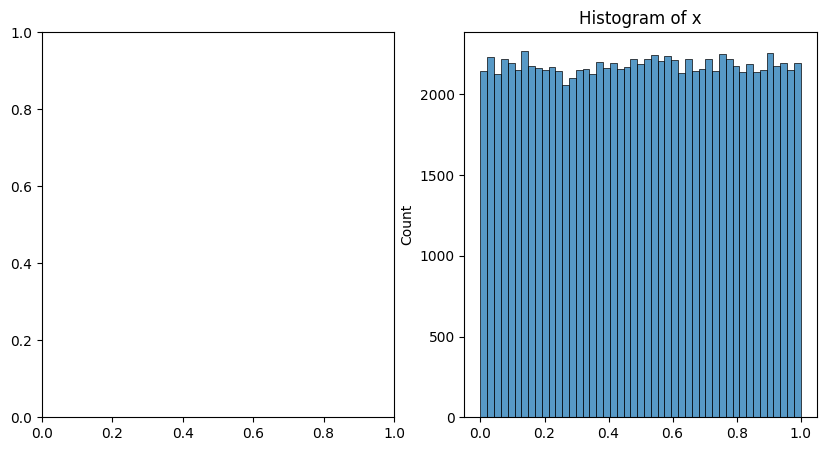

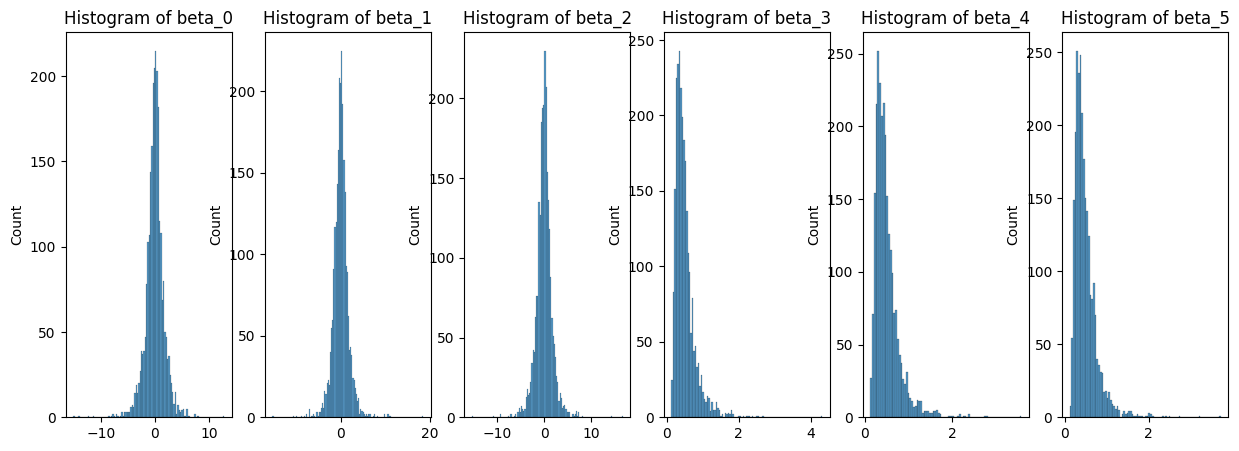

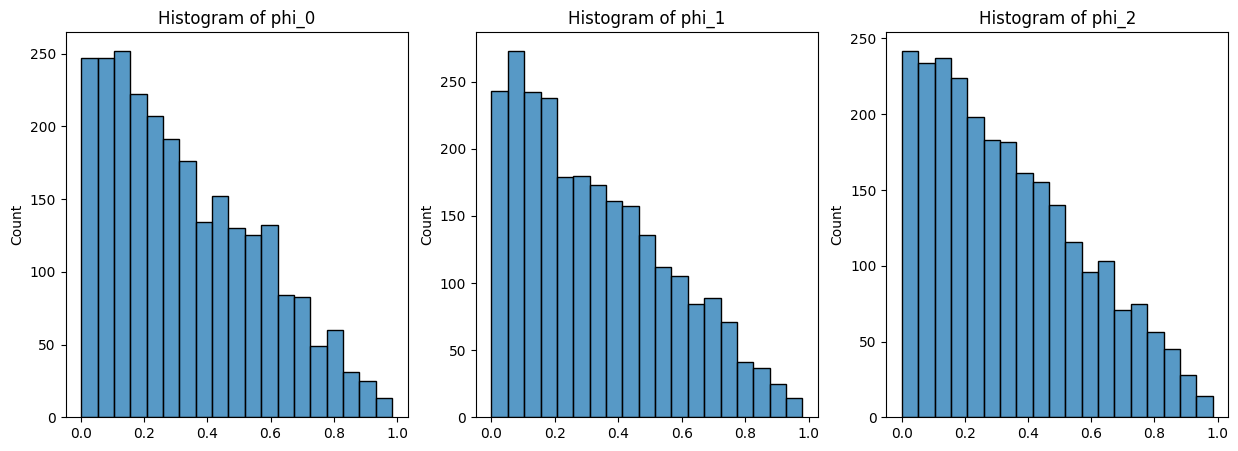

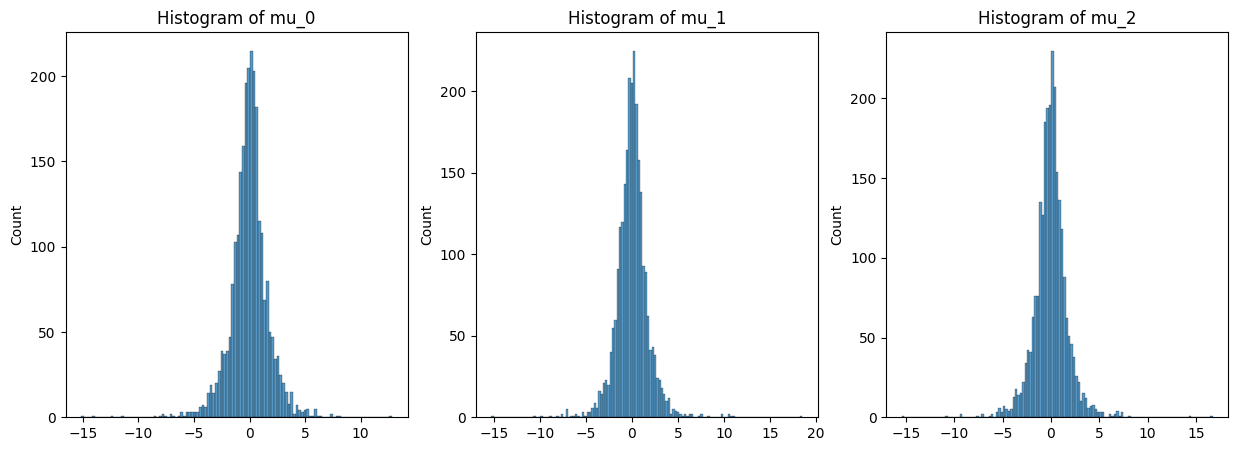

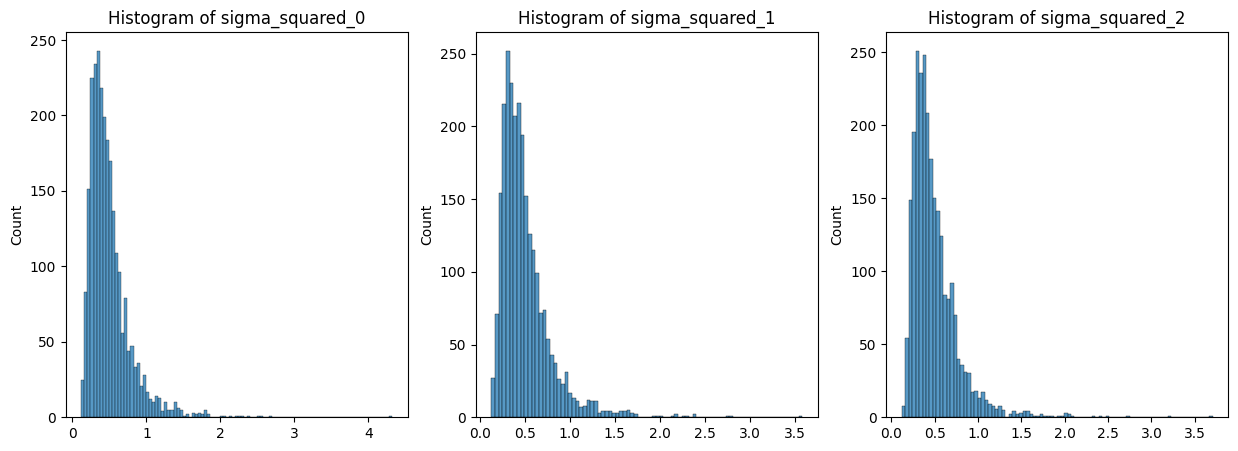

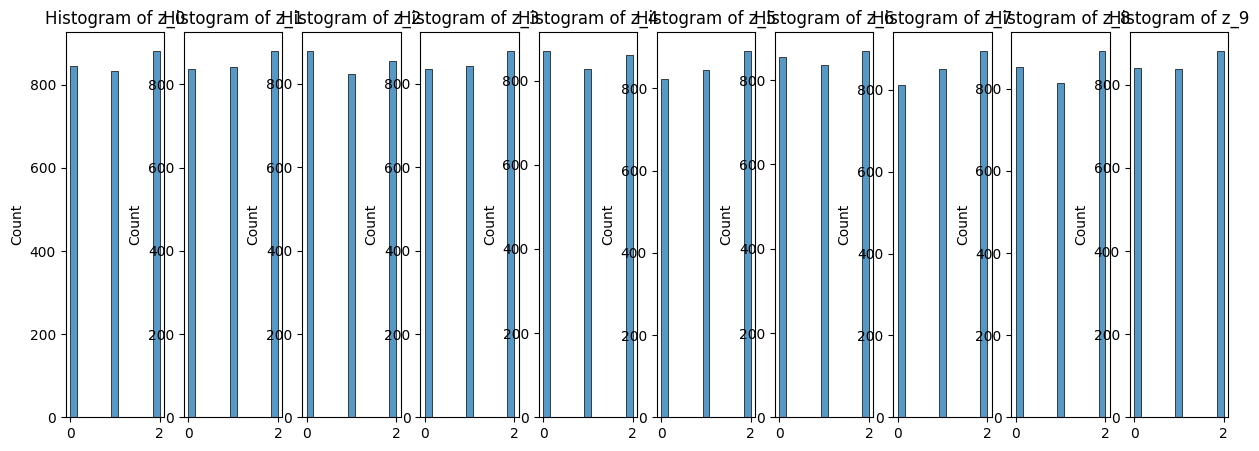

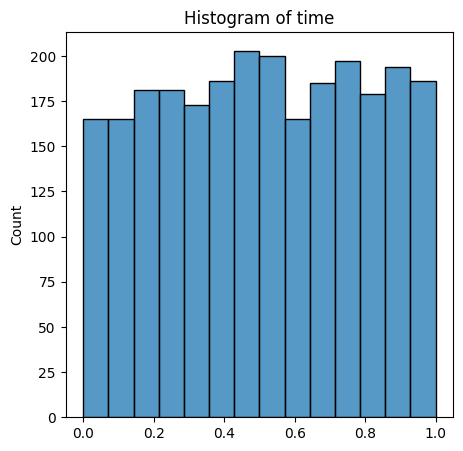

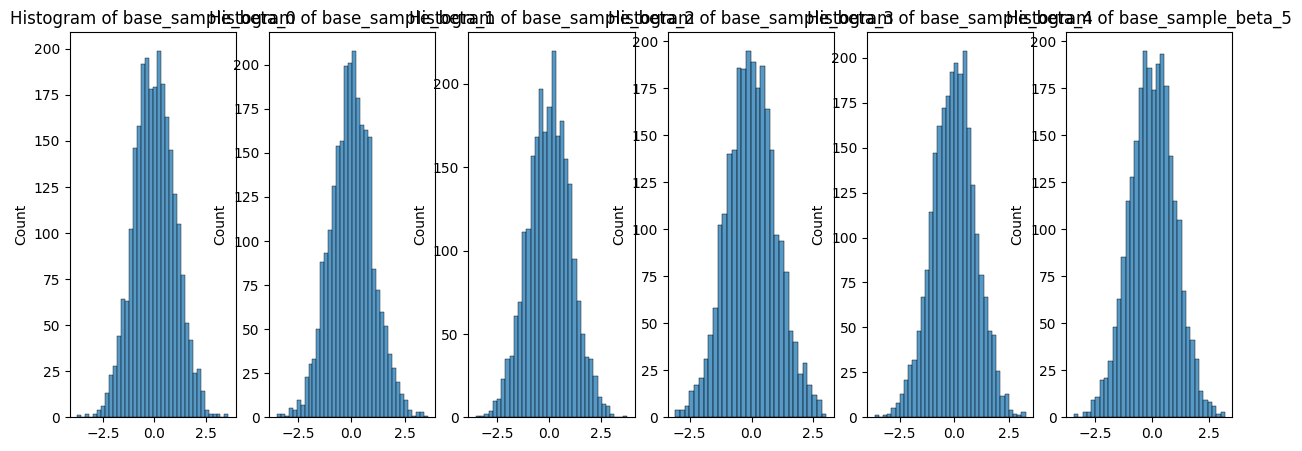

####################################################################################################
Epoch 99


100%|██████████| 10/10 [00:00<00:00, 66.78it/s]


{'X': {'mean': tensor(0.5002), 'variance': tensor(0.0838), 'min': tensor(1.1325e-06), 'max': tensor(1.0000), 'mean_mean': tensor([0.5011, 0.4979, 0.4996, 0.5020]), 'variance_mean': tensor([0.0849, 0.0827, 0.0838, 0.0835]), 'min_mean': None, 'max_mean': None}, 'beta': {'mean': tensor(0.2487), 'variance': tensor(1.5274), 'min': tensor(-11.9655), 'max': tensor(14.2856), 'mean_mean': tensor(0.2487), 'variance_mean': tensor(1.6196), 'min_mean': None, 'max_mean': None}}
Statistics for phi:
Mean: tensor([0.3335, 0.3361, 0.3303])
Variance: tensor([0.0562, 0.0579, 0.0567])
Min: tensor([2.3749e-04, 2.0066e-05, 1.9595e-04])
Max: tensor([0.9807, 0.9893, 0.9843])
Mean of means: 0.3333333730697632
Mean of variances: 0.08534307032823563
Mean of minimums: None
Mean of maximums: None


Statistics for mu:
Mean: tensor([ 0.0414, -0.0721,  0.0024])
Variance: tensor([2.9808, 2.9652, 2.9841])
Min: tensor([ -8.8360, -11.9655, -11.6322])
Max: tensor([14.2856, 12.7277, 12.7270])
Mean of means: -0.0094321118667

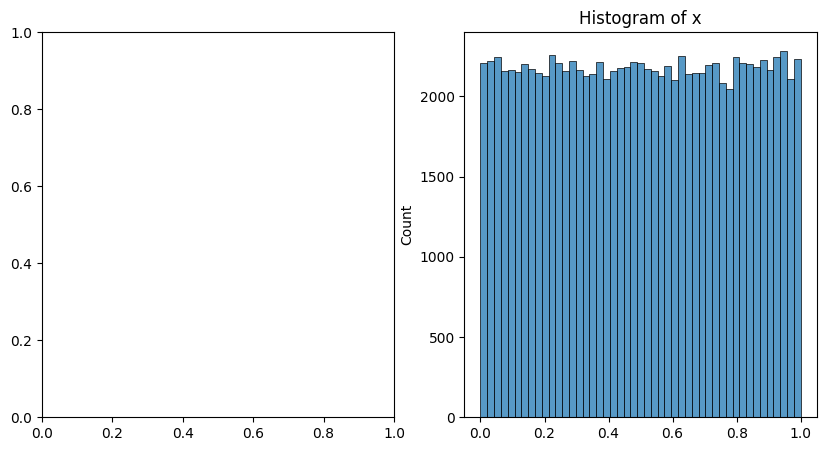

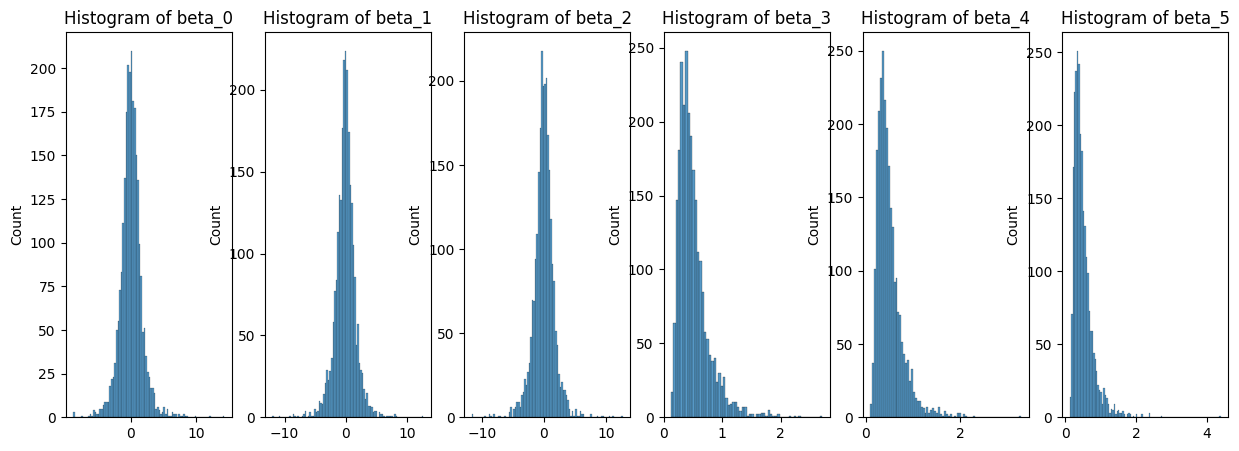

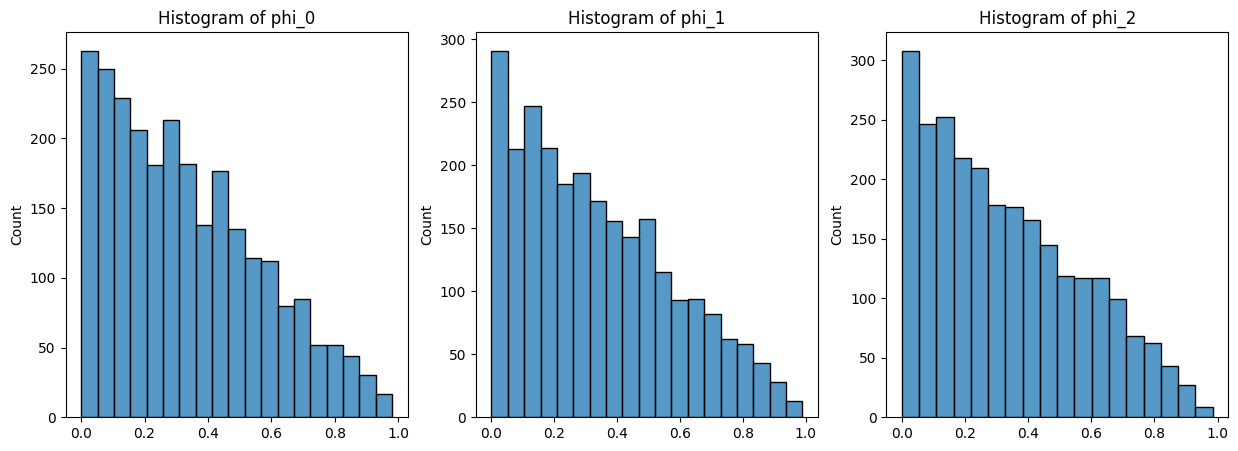

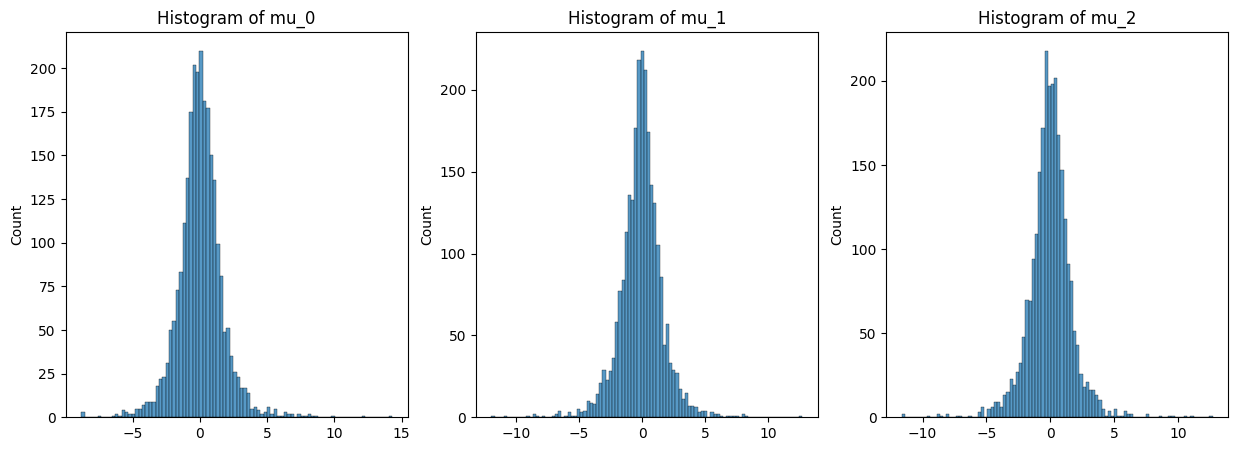

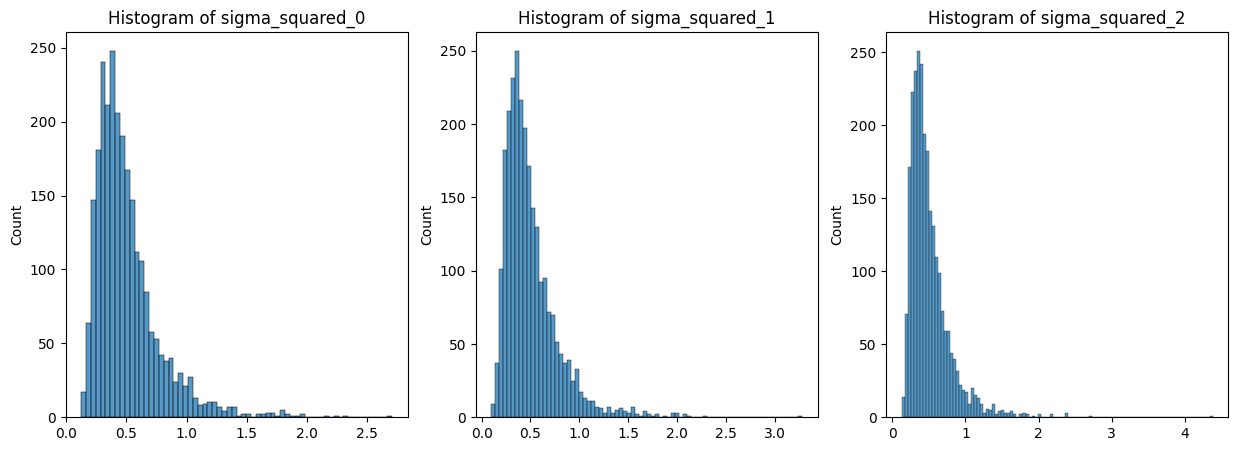

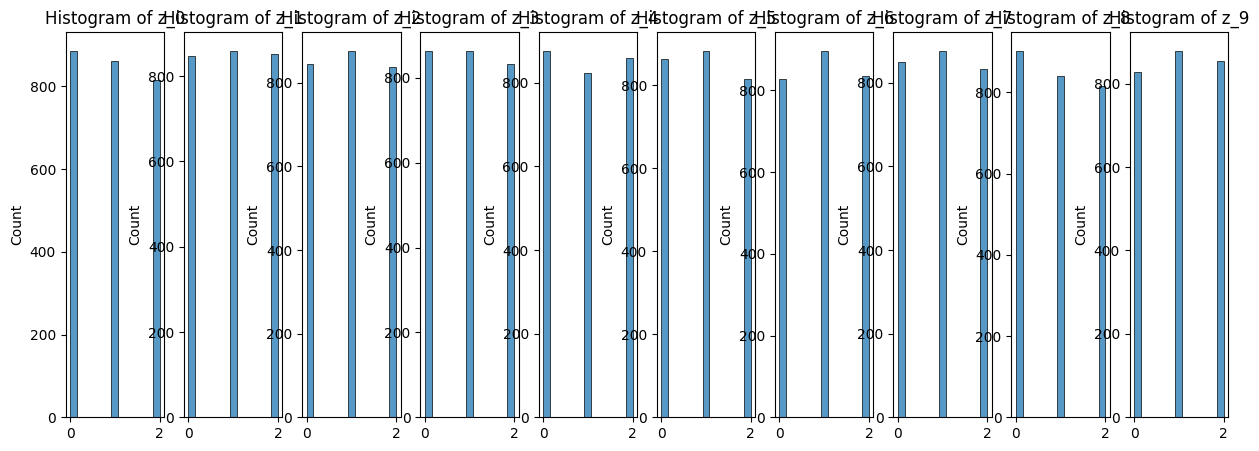

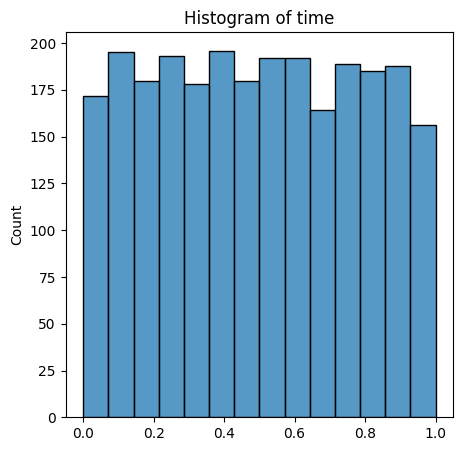

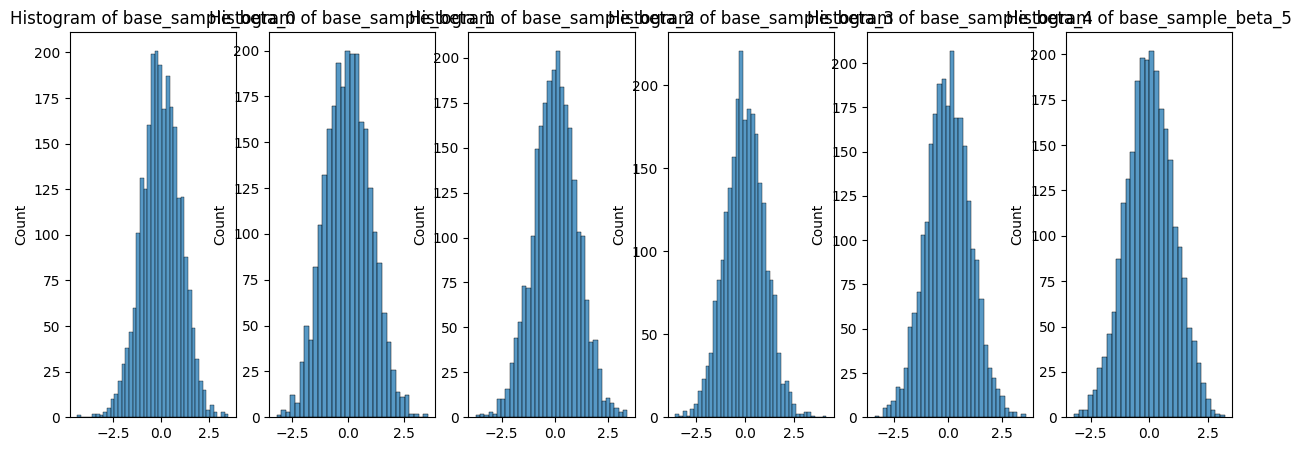

[{'X': {'mean': tensor(0.5008),
   'variance': tensor(0.0833),
   'min': tensor(8.3447e-07),
   'max': tensor(1.0000),
   'mean_mean': tensor([0.5013, 0.5044, 0.4977, 0.4999]),
   'variance_mean': tensor([0.0820, 0.0832, 0.0841, 0.0833]),
   'min_mean': None,
   'max_mean': None},
  'beta': {'mean': tensor(0.2488),
   'variance': tensor(1.6179),
   'min': tensor(-15.4054),
   'max': tensor(18.4979),
   'mean_mean': tensor(0.2488),
   'variance_mean': tensor(1.6799),
   'min_mean': None,
   'max_mean': None}},
 {'X': {'mean': tensor(0.5002),
   'variance': tensor(0.0838),
   'min': tensor(1.1325e-06),
   'max': tensor(1.0000),
   'mean_mean': tensor([0.5011, 0.4979, 0.4996, 0.5020]),
   'variance_mean': tensor([0.0849, 0.0827, 0.0838, 0.0835]),
   'min_mean': None,
   'max_mean': None},
  'beta': {'mean': tensor(0.2487),
   'variance': tensor(1.5274),
   'min': tensor(-11.9655),
   'max': tensor(14.2856),
   'mean_mean': tensor(0.2487),
   'variance_mean': tensor(1.6196),
   'min_mean':

In [41]:
data_generator.check_model(
    n_samples_per_epoch=N_SAMPLES_PER_EPOCH,
    epochs_to_check = [0, N_EPOCHS-1],
    p = P,
    n = N,
    used_batch_samples = 10
)

In [42]:
epoch_loader = data_generator.make_epoch_loader(
    n = N,
    p = P,
    number_of_batches_per_epoch = N_BATCHES_PER_EPOCH,
    n_epochs = N_EPOCHS,
    batch_size= BATCH_SIZE,
    train_frac= 0.5,
    val_frac= 0.1,
    shuffle=False,
    n_samples_to_generate_at_once = 250_000
)

The number of batches times the number of epochs must be equal to the total number of iterations in the curriculum. But got 49971200 and 24985600 respectively


In [43]:
sample_batch = next(iter(epoch_loader[0][0]))
sample_batch.keys()

dict_keys(['phi', 'mu', 'sigma_squared', 'z', 'x', 'beta', 'time', 'base_sample_beta'])

In [44]:
sample_batch["x"].shape, sample_batch["beta"].shape

(torch.Size([1024, 10, 4]), torch.Size([1024, 6]))

In [45]:
2*K

6

In [46]:
"""
model = TransformerCNFConditionalDecoder(
    n_input_features_encoder = 1,
    n_input_features_decoder = 2*P,
    d_model_encoder = 512,
    d_model_decoder = 512,
    n_heads_encoder = 8,
    n_heads_decoder = 8,
    d_ff_encoder = 1024,
    d_ff_decoder = 1024,
    dropout_encoder = 0.1,
    dropout_decoder = 0.1,
    n_conditional_input_features =  1,
    n_condition_features = 512,
    n_layers_condition_embedding = 3,
    n_layers_encoder = 8,
    n_layers_decoder = 6,
    use_positional_encoding_encoder = True,
    use_positional_encoding_decoder = False,
    use_self_attention_decoder = False,
    output_dim = 2*P,
    d_final_processing = 512,
    n_final_layers = 3,
    dropout_final = 0.1,
    treat_z_as_sequence = False,
)
"""

model = TransformerCNFConditionalDecoder(
    n_input_features_encoder = P,
    n_input_features_decoder = 2*K,
    d_model_encoder = 16,
    d_model_decoder = 16,
    n_heads_encoder = 1,
    n_heads_decoder = 1,
    d_ff_encoder = 16,
    d_ff_decoder = 16,
    dropout_encoder = 0.1,
    dropout_decoder = 0.1,
    n_conditional_input_features =  1,
    n_condition_features = 16,
    n_layers_condition_embedding = 3,
    n_layers_encoder = 8,
    n_layers_decoder = 6,
    use_positional_encoding_encoder = True,
    use_positional_encoding_decoder = False,
    use_self_attention_decoder = False,
    output_dim = 2*K,
    d_final_processing = 16,
    n_final_layers = 3,
    dropout_final = 0.1,
    treat_z_as_sequence = False,
)

In [47]:
loss_fun = CFMLossOT2(
    sigma_min=1e-4
)

In [48]:
opt = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
scheduler = OneCycleLR(opt,
                       max_lr = 5e-4,
                       epochs = N_EPOCHS,
                       steps_per_epoch = N_SAMPLES_PER_EPOCH//BATCH_SIZE,
                       pct_start = 0.1,
                       div_factor=25.0,
                       final_div_factor=1e4)

#scheduler = ReduceLROnPlateau(opt)

additional_evals = {
}



In [49]:
trainer = TrainerCurriculumCNF_LatentFactor(
    model = model,
    optimizer=opt,
    scheduler = scheduler,
    loss_function=loss_fun,
    epoch_loader = epoch_loader,
    evaluation_functions= additional_evals,
    n_epochs = N_EPOCHS,
    early_stopping_patience = 200,
    schedule_step_on = "batch",
    save_path = None,
    coupling = None,
    use_same_timestep_per_batch = False,
    use_train_mode_during_validation = False,
    max_gradient_norm = 1.0

)

In [50]:
trainer.validate()

100%|██████████| 49/49 [00:11<00:00,  4.26it/s]


{'loss_mean': 2.8171703815460205,
 'loss_median': 2.8119869232177734,
 'loss_std': 0.10853306204080582}

In [51]:
r = trainer.train()

Curriculum parameters: {'n': 10, 'p': 4, 'k': 3, 'batch_size': 1024, 'a1': 5.0, 'b1': 2.0, 'dirichlet_beta': 1.0, 'lambda1': 3.0} at iteration 0


 53%|█████▎    | 26/49 [00:09<00:08,  2.75it/s]


KeyboardInterrupt: 

In [52]:
full_model = ModelToPosteriorCNF(
    model = model.eval(),
    sample_name = "beta",
    sample_shape = (2*K,),
    n_samples=1000,
    batch_size = BATCH_SIZE,
    solve_adjoint = True,
    atol = 10,
    rtol = 10,
    #device = torch.device("cpu")
)

benchmark_params_ppgrogram = data_generator.curriculum.get_params(-1)
del benchmark_params_ppgrogram["batch_size"]
print(f"params for pprogram: {benchmark_params_ppgrogram}")

pprogram1 = make_gmm_program_spherical(**benchmark_params_ppgrogram)

pprogram1_x = return_only_x(pprogram1)



params for pprogram: {'n': 10, 'p': 4, 'k': 3, 'a1': 5.0, 'b1': 2.0, 'dirichlet_beta': 1.0, 'lambda1': 3.0}


In [53]:
test_batch = next(iter(epoch_loader[0][1]))
x_test = test_batch["x"]

In [54]:
x_test.shape

torch.Size([1024, 10, 4])

In [55]:
full_model.sample_posterior(x_test[0])

0it [00:00, ?it/s]


{'beta': tensor([[-6.6693e+11,  1.5674e+11, -1.4162e+11, -3.3623e+11,  3.8388e+11,
          -3.0286e+10],
         [-6.6693e+11,  1.5674e+11, -1.4162e+11, -3.3623e+11,  3.8388e+11,
          -3.0286e+10],
         [-6.6693e+11,  1.5674e+11, -1.4162e+11, -3.3623e+11,  3.8388e+11,
          -3.0286e+10],
         ...,
         [-6.6693e+11,  1.5674e+11, -1.4162e+11, -3.3623e+11,  3.8388e+11,
          -3.0286e+10],
         [-6.6693e+11,  1.5674e+11, -1.4162e+11, -3.3623e+11,  3.8388e+11,
          -3.0286e+10],
         [-6.6693e+11,  1.5674e+11, -1.4162e+11, -3.3623e+11,  3.8388e+11,
          -3.0286e+10]], grad_fn=<CatBackward0>),
 'X': tensor([[0.2145, 0.4279, 0.3287, 0.5987],
         [0.1200, 0.6117, 0.9507, 0.0661],
         [0.4970, 0.0021, 0.2086, 0.0141],
         [0.1510, 0.0963, 0.3335, 0.2430],
         [0.5203, 0.4277, 0.3557, 0.7002],
         [0.4403, 0.6215, 0.2240, 0.4310],
         [0.7771, 0.0853, 0.7808, 0.2284],
         [0.1504, 0.0456, 0.4838, 0.7674],
         

In [56]:
hmc = Hamiltionian_MC(
    pprogram=pprogram1_x,
    n_samples=500,
    n_warmup=500
)

models = make_default_list_comparison(pprogram= pprogram1_x, n_samples= 1000)

In [64]:
evaluation = Evaluate(
    posterior_model = full_model,
    evaluation_loader = trainer.testset,
    comparison_models= models[1:],
    n_evaluation_cases=2,
    save_path= None,
    overwrite_results = True,
    results_dict_to_data_for_model = results_dict_to_data_x_tuple,
    results_dict_to_latent_variable_comparison_models= result_dict_to_latent_variable_convert_mu_sigma_to_beta,
    result_dict_to_data_for_comparison_models= results_dict_to_data_x_tuple_transpose
)

In [65]:
evaluation.run_evaluation()

Sampling posterior:   0%|          | 0/2 [00:00<?, ?it/s]

....................


Sampling posterior:  50%|█████     | 1/2 [00:37<00:37, 37.46s/it]

....................


Sampling posterior:   0%|          | 0/2 [00:00<?, ?it/s]

....................


Sampling posterior:  50%|█████     | 1/2 [00:38<00:38, 38.58s/it]

....................


Sampling posterior:   0%|          | 0/2 [00:00<?, ?it/s]

....................


Sampling posterior:  50%|█████     | 1/2 [00:32<00:32, 32.21s/it]

....................


Sampling posterior:   0%|          | 0/2 [00:00<?, ?it/s]

....................


Sampling posterior:  50%|█████     | 1/2 [00:37<00:37, 37.81s/it]

....................


Sampling posterior:   0%|          | 0/2 [00:00<?, ?it/s]

....................


Sampling posterior:  50%|█████     | 1/2 [00:48<00:48, 48.40s/it]

....................


100%|██████████| 100/100 [00:00<00:00, 505.51it/s]


An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_sam

100%|██████████| 100/100 [00:00<00:00, 550.15it/s]

An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_sam


100%|██████████| 100/100 [00:00<00:00, 641.97it/s]


An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_sam

100%|██████████| 2/2 [00:00<?, ?it/s]


An exception occured in compare_to_gt_perplexity_kde: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.
An exception occured in compare_to_gt_MAP: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.
An exception occured in compare_to_gt_perplexity_kde: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covaria

  0%|          | 0/100 [00:00<?, ?it/s]

An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_sam

 26%|██▌       | 26/100 [00:00<00:00, 187.44it/s]

An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_sam

 45%|████▌     | 45/100 [00:00<00:00, 185.19it/s]

An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_sam

 68%|██████▊   | 68/100 [00:00<00:00, 203.16it/s]

An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_sam

100%|██████████| 100/100 [00:00<00:00, 235.31it/s]


An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_sam

100%|██████████| 100/100 [00:00<00:00, 538.75it/s]


An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_sam

100%|██████████| 100/100 [00:00<00:00, 579.57it/s]


An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_samples=4.
An error occured in compare_samples_classifier_based: Cannot have number of splits n_splits=10 greater than the number of samples: n_sam

,Model,GT,Mean_joint_Wasserstein_distance with metric euclidean,Mean_joint_MMD,Mean_joint_cst_roc_auc,Mean_gt_parameter_Perplextiy,Mean_gt_parameter_MAP diff,Mean_gt_parameter_Mean diff,Std_joint_Wasserstein_distance with metric euclidean,Std_joint_MMD,Std_joint_cst_roc_auc,Std_gt_parameter_Perplextiy,Std_gt_parameter_MAP diff,Std_gt_parameter_Mean diff
0,<PFNExperiments.LinearRegression.Models.ModelT...,gt,8.728841e+11,7.129570,NaN,-6.496456e+13,2.880606e+11,2.880612e+11,92681.900024,6.743496e-07,NaN,5.033593e+13,1.316662e+09,1.316454e+09
1,Variational Inference with guide: _bound_parti...,gt,3.162825e+00,2.826383,NaN,-4.389363e+03,1.476669e+00,1.491323e+00,0.132602,1.055760e-01,NaN,5.420974e+03,7.849238e-01,8.443379e-01
2,Variational Inference with guide: _bound_parti...,gt,3.040435e+00,3.344893,NaN,-3.472772e+03,1.485181e+00,1.472137e+00,0.000940,4.269341e-02,NaN,3.972205e+03,9.815611e-01,8.694633e-01
3,Variational Inference with guide: _bound_parti...,gt,3.005775e+00,3.344011,NaN,NaN,NaN,1.668882e+00,0.000000,0.000000e+00,NaN,NaN,NaN,8.998849e-01
4,Variational Inference with guide: _bound_parti...,gt,3.332257e+00,3.318525,NaN,-1.706706e+03,1.687450e+00,1.796757e+00,0.139139,3.166432e-01,NaN,2.327400e+03,8.183759e-01,6.864402e-01
5,Variational Inference with guide: _bound_parti...,gt,3.029009e+00,3.329754,NaN,-9.455597e+03,1.605745e+00,1.602364e+00,0.179395,1.638103e-01,NaN,5.375257e+03,8.380238e-01,8.420707e-01


P-values:


,Model 1,Model 2,joint_Wasserstein_distance with metric euclidean_p-value,joint_MMD_p-value,joint_cst_roc_auc_p-value,gt_parameter_Perplextiy_p-value,gt_parameter_MAP diff_p-value,gt_parameter_Mean diff_p-value
0,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,0.5,0.5,NaN,0.5,0.5,0.5
1,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,0.5,0.5,NaN,0.5,0.5,0.5
2,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,0.5,0.5,NaN,NaN,NaN,0.5
3,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,0.5,0.5,NaN,0.5,0.5,0.5
4,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,0.5,0.5,NaN,0.5,0.5,0.5
5,Variational Inference with guide: _bound_parti...,Variational Inference with guide: _bound_parti...,0.5,0.5,NaN,1.0,1.0,0.5
6,Variational Inference with guide: _bound_parti...,Variational Inference with guide: _bound_parti...,0.5,0.5,NaN,NaN,NaN,0.5
7,Variational Inference with guide: _bound_parti...,Variational Inference with guide: _bound_parti...,0.5,0.5,NaN,0.5,0.5,0.5
8,Variational Inference with guide: _bound_parti...,Variational Inference with guide: _bound_parti...,1.0,0.5,NaN,0.5,0.5,0.5
9,Variational Inference with guide: _bound_parti...,Variational Inference with guide: _bound_parti...,0.5,1.0,NaN,NaN,NaN,0.5



Comparison among models:

Summarized results:


,Model 1,Model 2,Mean_Wasserstein_distance with metric euclidean,Mean_MMD,Mean_cst_roc_auc,Std_Wasserstein_distance with metric euclidean,Std_MMD,Std_cst_roc_auc
0,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,8.728841e+11,7.742188,1.00000,3.997834e+09,0.000000,0.000000
1,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,8.728841e+11,7.742188,1.00000,3.997834e+09,0.000000,0.000000
2,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,8.728841e+11,7.742188,1.00000,3.997834e+09,0.000000,0.000000
3,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,8.728841e+11,7.742188,1.00000,3.997834e+09,0.000000,0.000000
4,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,8.728841e+11,7.742188,1.00000,3.997834e+09,0.000000,0.000000
5,Variational Inference with guide: _bound_parti...,Variational Inference with guide: _bound_parti...,3.855695e-01,0.033404,0.62500,5.412996e-02,0.013306,0.048083
6,Variational Inference with guide: _bound_parti...,Variational Inference with guide: _bound_parti...,1.589739e+00,2.119754,1.00000,3.277423e-03,0.054202,0.000000
7,Variational Inference with guide: _bound_parti...,Variational Inference with guide: _bound_parti...,1.590191e+00,0.948255,0.97525,2.823405e-01,0.173008,0.008839
8,Variational Inference with guide: _bound_parti...,Variational Inference with guide: _bound_parti...,1.577411e+00,1.341264,0.99475,1.133398e-01,0.578591,0.000354
9,Variational Inference with guide: _bound_parti...,Variational Inference with guide: _bound_parti...,1.625378e+00,2.236368,1.00000,8.354854e-03,0.107880,0.000000


P-values:


,Pair 1: Model A,Pair 1: Model B,Pair 2: Model A,Pair 2: Model B,Wasserstein_distance with metric euclidean_p-value,MMD_p-value,cst_roc_auc_p-value
0,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,1.000000,1.000000,1.000000
1,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,1.000000,1.000000,1.000000
2,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,1.000000,1.000000,1.000000
3,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,1.000000,1.000000,1.000000
4,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,Variational Inference with guide: _bound_parti...,Variational Inference with guide: _bound_parti...,0.245278,0.220671,0.220671
5,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,Variational Inference with guide: _bound_parti...,Variational Inference with guide: _bound_parti...,0.245278,0.220671,1.000000
6,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,Variational Inference with guide: _bound_parti...,Variational Inference with guide: _bound_parti...,0.245278,0.220671,0.220671
7,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,Variational Inference with guide: _bound_parti...,Variational Inference with guide: _bound_parti...,0.245278,0.220671,0.220671
8,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,1.000000,1.000000,1.000000
9,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,1.000000,1.000000,1.000000


{'summarized_results': {'comparison_to_gt':                                                Model  GT  \
  0  <PFNExperiments.LinearRegression.Models.ModelT...  gt   
  1  Variational Inference with guide: _bound_parti...  gt   
  2  Variational Inference with guide: _bound_parti...  gt   
  3  Variational Inference with guide: _bound_parti...  gt   
  4  Variational Inference with guide: _bound_parti...  gt   
  5  Variational Inference with guide: _bound_parti...  gt   
  
     Mean_joint_Wasserstein_distance with metric euclidean  Mean_joint_MMD  \
  0                                       8.728841e+11            7.129570   
  1                                       3.162825e+00            2.826383   
  2                                       3.040435e+00            3.344893   
  3                                       3.005775e+00            3.344011   
  4                                       3.332257e+00            3.318525   
  5                                       3.029009e+0

In [83]:
from PFNExperiments.Evaluation.RealWorldEvaluation.PreprocessDataset import Preprocessor, PreprocessorClassification

In [85]:
from PFNExperiments.Evaluation.RealWorldEvaluation.Preprocess_multivariate_GMM import Preprocessor_GMM_multivariate
from PFNExperiments.Evaluation.RealWorldEvaluation.GetDataOpenML import GetDataOpenML
getdata = GetDataOpenML(
    preprocessor = Preprocessor_GMM_multivariate(
        N_datapoints = N,
        P_features = P,
        x_mean = 0.0,
        x_var = 1.0,
    ),
    save_path = "C:/Users/arik_/Documents/Dokumente/Job_Clausthal/PFNs/Repository/PFNExperiments/Evaluation/RealWorldEvaluation/DatasetsOpenML/Tabular_benchmark_numerical_regression.pkl",
    benchmark_id = 336
)
datasets = getdata.get_data()

In [91]:
comparison_models = make_default_list_comparison(pprogram= pprogram1_x, n_samples= 1000)

In [94]:
from PFNExperiments.Evaluation.RealWorldEvaluation.EvaluateRealWorld import EvaluateRealWorld


eval = EvaluateRealWorld(
    
    posterior_model = full_model,
    evaluation_datasets = datasets,
    comparison_models = comparison_models[1:3],
    n_evaluation_cases = 2,
    results_dict_to_data_for_model = results_dict_to_data_x_tuple,
    results_dict_to_latent_variable_comparison_models= result_dict_to_latent_variable_convert_mu_sigma_to_beta,
    result_dict_to_data_for_comparison_models= results_dict_to_data_x_tuple_transpose
)

In [95]:
eval.run_evaluation()

Sampling posterior:   0%|          | 0/2 [00:00<?, ?it/s]

....................


Sampling posterior:  50%|█████     | 1/2 [00:44<00:44, 44.55s/it]

....................


Sampling posterior:   0%|          | 0/2 [00:00<?, ?it/s]

....................


Sampling posterior:  50%|█████     | 1/2 [00:40<00:40, 40.53s/it]

....................


Sampling posterior: 100%|██████████| 2/2 [01:21<00:00, 40.56s/it]


Comparison to ground truth:

Summarized results:

Comparison among models:

Summarized results:


,Model 1,Model 2,Mean_Wasserstein_distance with metric euclidean,Mean_MMD,Mean_cst_roc_auc,Std_Wasserstein_distance with metric euclidean,Std_MMD,Std_cst_roc_auc
0,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,8.689711e+11,7.742188,1.000,7.299348e+09,0.000000,0.000000
1,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,8.689711e+11,7.742188,1.000,7.299348e+09,0.000000,0.000000
2,Variational Inference with guide: _bound_parti...,Variational Inference with guide: _bound_parti...,9.993532e-01,0.958106,0.796,9.076034e-01,1.339099,0.262337


P-values:


,Pair 1: Model A,Pair 1: Model B,Pair 2: Model A,Pair 2: Model B,Wasserstein_distance with metric euclidean_p-value,MMD_p-value,cst_roc_auc_p-value
0,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,1.000000,1.000000,1.000000
1,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,Variational Inference with guide: _bound_parti...,Variational Inference with guide: _bound_parti...,0.245278,0.220671,0.220671
2,<PFNExperiments.LinearRegression.Models.ModelT...,Variational Inference with guide: _bound_parti...,Variational Inference with guide: _bound_parti...,Variational Inference with guide: _bound_parti...,0.245278,0.220671,0.220671


{'summarized_results': {'model_comparison_among_each_other':                                              Model 1  \
  0  <PFNExperiments.LinearRegression.Models.ModelT...   
  1  <PFNExperiments.LinearRegression.Models.ModelT...   
  2  Variational Inference with guide: _bound_parti...   
  
                                               Model 2  \
  0  Variational Inference with guide: _bound_parti...   
  1  Variational Inference with guide: _bound_parti...   
  2  Variational Inference with guide: _bound_parti...   
  
     Mean_Wasserstein_distance with metric euclidean  Mean_MMD  \
  0                                     8.689711e+11  7.742188   
  1                                     8.689711e+11  7.742188   
  2                                     9.993532e-01  0.958106   
  
     Mean_cst_roc_auc  Std_Wasserstein_distance with metric euclidean   Std_MMD  \
  0             1.000                                    7.299348e+09  0.000000   
  1             1.000                 